# Week 5
This week, you will examine the following: support vector machines (SVMs), the kernel trick, and regularization for support vector machines.

### Learning Objectives
At the end of this week, you should be able to: 
- Describe how a support vector machine creates a decision boundary and how the margin relates to classification performance. 
- Identify the role of support vectors and explain how they determine the position of the decision boundary. 
- Use different kernel functions (linear, polynomial, Gaussian) to apply the kernel trick and transform data for better classification. 
- Adjust the regularization parameter $C$ in SVMs to balance margin size and classification accuracy on the training data.

## 5.1 Lesson: Support Vector Machines, the Kernel Trick, and Regularization

### Support Vector Machines (SVMs), Feature Scaling
An **SVM** is a technique for separating one set of points from another via a hyperplane. This hyperplane is a linear discriminant: 
- Points on one side belong to one group. 
- Points on the other side belong to the other group. 
- This is useful for classifying data. 

For example: 
- A financial institution might use SVMs to detect fraudulent credit card transactions by classifying patterns of spending behavior as either normal or suspicious. By analyzing features such as transaction amount, location, and time, the SVM can create a decision boundary that separates legitimate transactions from potential fraud. The margin is the distance between the hyperplane and the nearest point on each side. 
- If the margin is positive on each side, it means that the hyperplane splits the data perfectly into two classes — with room to spare. The more room there is to spare, the better the split. 

Thus, if one hyperplane gives a margin of 2 points on each side, and another gives a margin of only 0.02 points on each side, then the latter hyperplane is cutting it close — we can be less confident that points on one side always belong to class A and points on the other side always belong to class B. 

![Josh Von Korff_W5_Margin.jpg](<attachment:Josh Von Korff_W5_Margin.jpg>)

One goal of the **SVM** is to maximize the margin, positioning the hyperplane so that the points on each side are as far from it as possible. This improves generalization, in the sense that if all of the training samples are far from the hyperplane, it is more likely that further samples will be, too. Then these further samples can be unambiguously classified. 

A **support vector** is one of those samples that is the closest to the decision boundary on each side — it is on the margin “hyperplane;” that is, its distance from decision boundary is equal to the margin. Because of the way the decision boundary is chosen, with the intent to maximize the margins, it is common for the margin hyperplane to intersect multiple samples. In this case, there are multiple support vectors. 

If you use SVMs in the most basic way, it is not that different from logistic regression — only it assigns points definitely to one class or another, rather than assigning probabilities. 
___
### Kernel Trick
The **kernel trick** means taking advantage of the fact that SVM happens to do all its calculations using only the inner products of the points involved. 
- If we can easily compute the inner products, we may be able to run the SVM easily — even (weirdly) if we never compute the coordinates of the points themselves. 
- The inner product between two points — particularly when we don’t compute the points — is called a **“kernel function.”**
- If we just use the ordinary inner product, computing the SVM as described above in the simple case, we are using a **“linear kernel.”** 
___
However, we can also use a **"Polynomial Kernel":**
- Suppose that for points $x$ and $z$ in the original sample, we use the kernel $K(x,z) \; = \; (x^{\top}z)^2$. (squaring the dot product between $x$ and $z$). 
- This is not an **inner product** between $x$ and $z$ (it would be, except for the square), but it is an inner product between vectors like this:
$$\text{Vec} \; = \; (x_1 , x_1 , x_1 ,x_2 , x_1 , x_3 , x_2 , x_1 , x_2 , x_2 , x_2 , x_3 , x_3 , x_1, x_3 , x_2 ,x_3 , x_3)$$
- That's for a dimension of $N=3$, but we could do that for any dimension. If you make the $z$ version of this vector:
$$\text{Vec} \; = \; (z_1 , z_1 , z_1 ,z_2 , z_1 , z_3 , z_2 , z_1 , z_2 , z_2 , z_2 , z_3 , z_3 , z_1, z_3 , z_2 ,z_3 , z_3)$$
- and take their inner product, you'll see that it equals $(x^{\top}z)^2$. This allows use to compute the inner product $(x^{\top}z)^2$ in time $N$ even though computing the vector above $(\text{vec})$ is $N^2$-dimensional.
- More generally, we can use a kernel of $(x^{\top}z + c)^d$ to get a kernel based on vectors that are polynomial combinations of the $x_i$'s - ranging from degree $d$ down to degree $0$. The number $c$ controls the relative importance in terms of different degrees. 
- The idea is that while the new vectors are based on the points $x$ and $z$, they exist in a higher-dimension space (in this case, a nine-dimensional space). Therefore, the hyperplanes in the new, nine-dimensional space correspond to some other shapes (curved shapes) in the original space. That means that relative to the new, nine-dimensional space, we have flat hyperplanes (linear discriminants), but relative to the original, three-dimensional space, we have curved surfaces separating the two groups. They are “nonlinear” discriminants. This enables us to separate the groups in more complex ways. 
___
In a **Gaussian kernel**, we use the kernel:

$$K(x,z) \; = \; \exp \left( \frac{\| x - z \|^2}{2\sigma^2} \right)$$

This does not correspond to any specific vectors, based on $x$ and $z$, of which we are taking the inner product. (Or, if there are such vectors, they’d have to be found in an infinite dimensional vector space!) However, it is “close enough” to being an inner product that the SVM works anyway, and we can use it to classify samples just as before.

### Regularization
Sometimes, we have to balance two different goals: 
- Making the margin large. 
- Ensuring that most or all points are outside the margin on both sides of the decision boundary. 

For example: 
- suppose we have a situation where the margin is tiny — there's just a thin margin between the two classes — but the data is otherwise perfectly divided. 
- However, suppose the margin is forced to be thin because of just two or three points out of millions. 

If it weren’t for those two or three points, the margin would be much larger. In that case, we might opt to make the margin large, even if those two or three points would be ignored. 

On the other hand, if the margin is narrow because there are thousands of points on either side of the decision boundary that are close together, then we might choose to keep the margin narrow. 

SVMs have a regularization parameter $C$ just like linear regression does. Larger values of $C$ try to classify all points correctly. Smaller values try to make the margin large.

### Think About It:
- Is it possible to be sure that the margin on one side of the hyperplane equals the margin on the other side? (Hint: We are allowed to move the hyperplane.) 
- Compute the polynomial kernel for vectors of dimension 2 (smaller than the example, which is dimension 3). Use $c = 0$. This is the simplest possible polynomial kernel that isn’t trivial. Find the vectors whose inner product is equal to $(x^{\top}z)^2$. 
- How can we tell that the Gaussian kernel $K(x, z)$ is not simply the inner product of $x$ with $z$? Is it easy to find some other vectors of which it is the inner product?
- Why might maximizing the margin in an SVM model help improve how well it classifies new data? 
- How does using a kernel help an SVM separate data that can’t be split with a straight line? 
- When might it be better to allow a few points to be misclassified in exchange for a larger margin, and how does the regularization parameter $C$ help manage that trade-off? 
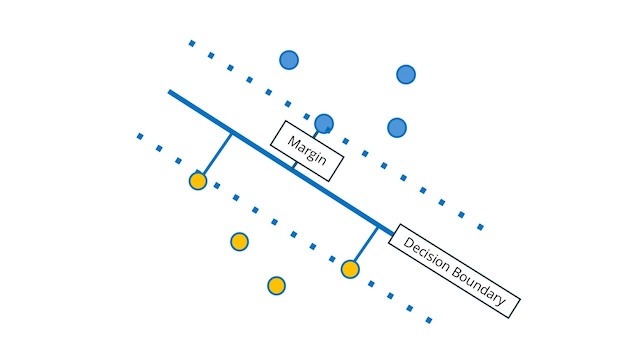